In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.validation import check_is_fitted


## Knowing the problem  

This is a classification problem. The aim is to predict whether an NBA rookie will stay in the league for > 5years (1) or not (0). This is the 'Target' column of the dataset  

We will use scikit-learn's KNeighborsClassifier predictor class  

The following steps will be taken
- Read data (train and test)
- Exploratory data analysis (correlation)
- Spliting the training data
- Standardizing the data
- Training the model
- Evaluating with training data
- Testing with the test data

### Step 1: Read the data to a dataframe

In [2]:
# read training and test data
train_df = pd.read_csv('data/Train_data.csv')
print(train_df.info()) # print the info
train_df.head() # print first 5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB
None

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [3]:
# cast Games played (GP) as integers since they are whole numbers
train_df['GP'] = train_df['GP'].astype(int)
train_df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


### Step 2: Exploratory data analysis  

- Create a correlation table of Target vs other parameters
- Divide the train data in to two, one for target 0 and target 1
- Perform summary statitics on both subsets to see trends
- Create a scatter plot of GP, MIN, PTS, FG%

In [4]:
# create two subsets of train data, target 0 and 1
target_0 = train_df[train_df["Target"] == 0]
target_1 = train_df[train_df["Target"] == 1]

In [5]:
# summary statistics of those < 5 years, excluding the Target column
target_0.drop(columns=["Target"]).describe().T

,count,mean,std,min,25%,50%,75%,max
GP,551.0,51.760436,16.420740,11.0,41.000000,51.000000,64.000000,82.000000
MIN,551.0,14.086825,6.193561,3.1,9.391092,13.100000,17.256120,37.000000
PTS,551.0,5.029547,2.942369,1.1,3.100000,4.200000,6.137233,21.900000
FGM,551.0,1.938020,1.139236,0.4,1.200000,1.624857,2.399082,8.000000
FGA,551.0,4.524805,2.449288,1.2,2.812043,3.890405,5.418301,17.600000
FG%,551.0,42.374270,6.141850,25.0,38.400000,41.949429,45.979053,59.600000
3P Made,551.0,0.228489,0.298401,0.0,0.000000,0.100000,0.400000,1.580128
3PA,551.0,0.748400,0.868977,0.0,0.065540,0.367431,1.203554,4.444359
3P%,551.0,19.030522,14.787113,0.0,0.000000,23.300000,31.600000,50.000000
FTM,551.0,0.930031,0.640112,0.0,0.500000,0.779553,1.150084,5.000000


In [6]:
# summary statistics of those > 5 years, excluding the target column 
target_1.drop(columns=["Target"]).describe().T

,count,mean,std,min,25%,50%,75%,max
GP,550.0,66.083636,14.974426,22.0,55.000,70.00,80.000,82.0
MIN,550.0,19.774909,8.641803,4.5,12.625,19.10,25.475,40.9
PTS,550.0,7.977818,4.659102,1.2,4.500,6.80,10.300,24.3
FGM,550.0,3.085273,1.800896,0.4,1.800,2.60,3.975,9.0
FGA,550.0,6.768727,3.864250,1.0,3.900,5.70,8.600,18.9
FG%,550.0,45.453636,5.672682,30.1,41.600,45.30,49.100,73.7
3P Made,550.0,0.255455,0.417684,0.0,0.000,0.00,0.375,2.3
3PA,550.0,0.786545,1.147168,0.0,0.000,0.20,1.100,6.5
3P%,550.0,19.070364,16.222362,0.0,0.000,21.95,33.200,100.0
FTM,550.0,1.554364,1.074904,0.1,0.800,1.30,2.075,7.5


Comparing the summary statistics for the two target cartegories above, players with >= 5 career years played tend to do better across most of the metrics compared to their counterparts. This is evident from the mean, median and the other quartiles.

In [7]:
train_df.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
GP,1.000000,0.597446,0.559332,0.562213,0.538190,0.311106,0.119768,0.106866,0.026659,0.503171,0.491696,0.200386,0.416948,0.479671,0.473715,0.362790,0.456121,0.303153,0.523640,0.415001
MIN,0.597446,1.000000,0.918264,0.905489,0.914114,0.211973,0.390542,0.398589,0.169725,0.811353,0.795711,0.241640,0.586255,0.756072,0.719870,0.625946,0.766311,0.432429,0.830394,0.354152
PTS,0.559332,0.918264,1.000000,0.991033,0.980013,0.272255,0.337452,0.341765,0.147124,0.899845,0.882502,0.246680,0.590605,0.716958,0.696668,0.546482,0.669969,0.433771,0.853030,0.354192
FGM,0.562213,0.905489,0.991033,1.000000,0.979742,0.308350,0.277842,0.282244,0.114917,0.853349,0.843725,0.214689,0.610619,0.723419,0.708522,0.521606,0.650974,0.442781,0.834749,0.356119
FGA,0.538190,0.914114,0.980013,0.979742,1.000000,0.145322,0.382426,0.399330,0.202011,0.832288,0.807849,0.262776,0.514503,0.655417,0.627248,0.587837,0.689307,0.360720,0.848879,0.327988
FG%,0.311106,0.211973,0.272255,0.308350,0.145322,1.000000,-0.304532,-0.360298,-0.376032,0.267298,0.320679,-0.142038,0.527119,0.431919,0.484302,-0.130397,0.040709,0.414445,0.125793,0.252236
3P Made,0.119768,0.390542,0.337452,0.277842,0.382426,-0.304532,1.000000,0.982678,0.619991,0.157143,0.090530,0.310734,-0.221181,0.017703,-0.072795,0.415002,0.353963,-0.157557,0.269701,0.037159
3PA,0.106866,0.398589,0.341765,0.282244,0.399330,-0.360298,0.982678,1.000000,0.612823,0.165934,0.096702,0.321690,-0.237302,0.007024,-0.086081,0.444800,0.379792,-0.172752,0.290051,0.018759
3P%,0.026659,0.169725,0.147124,0.114917,0.202011,-0.376032,0.619991,0.612823,1.000000,0.018112,-0.048118,0.329070,-0.294037,-0.132653,-0.198723,0.296920,0.233972,-0.264620,0.111586,0.001285
FTM,0.503171,0.811353,0.899845,0.853349,0.832288,0.267298,0.157143,0.165934,0.018112,1.000000,0.980388,0.236930,0.604364,0.686171,0.681736,0.473577,0.597443,0.462012,0.811781,0.333098


From the correlation table above, we can see that GP, MIN, PTS, and FGM are the metrics that correlates well with career years played while the 3 point metrics correlate poorly.  

We then visualize these below

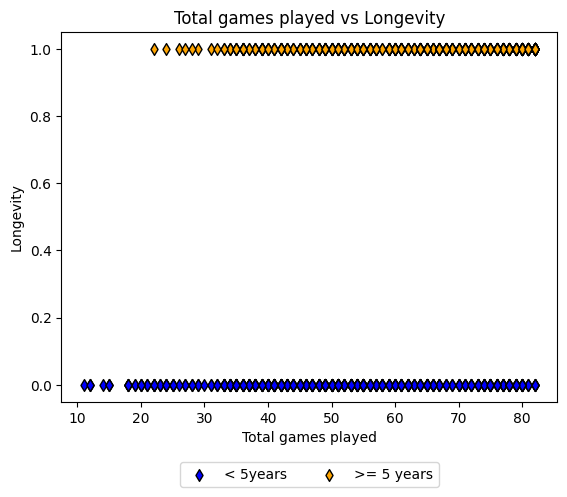

In [8]:
plt.scatter(target_0['GP'], target_0["Target"], c='blue', edgecolors='black', marker='d', label='< 5years')
plt.scatter(target_1['GP'], target_1["Target"], c='orange', edgecolors='black', marker='d', label='>= 5 years')
plt.xlabel("Total games played")
plt.ylabel("Longevity")
plt.title("Total games played vs Longevity")
plt.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.savefig("images/games_vs_target.png");

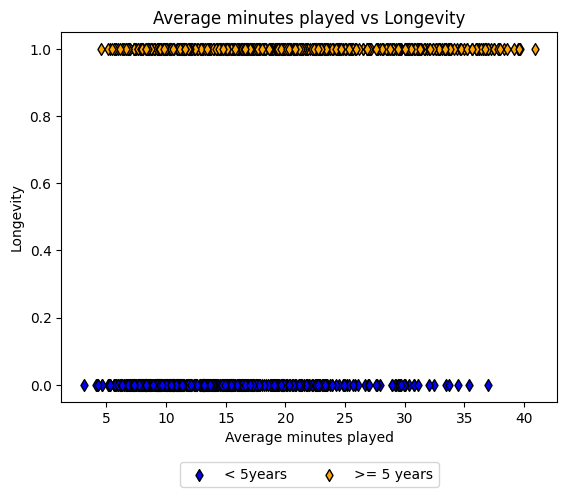

In [9]:
plt.scatter(target_0['MIN'], target_0["Target"], c='blue', edgecolors='black', marker='d', label='< 5years')
plt.scatter(target_1['MIN'], target_1["Target"], c='orange', edgecolors='black', marker='d', label='>= 5 years')
plt.xlabel("Average minutes played")
plt.ylabel("Longevity")
plt.title("Average minutes played vs Longevity")
plt.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.savefig("images/minutes_vs_target.png");

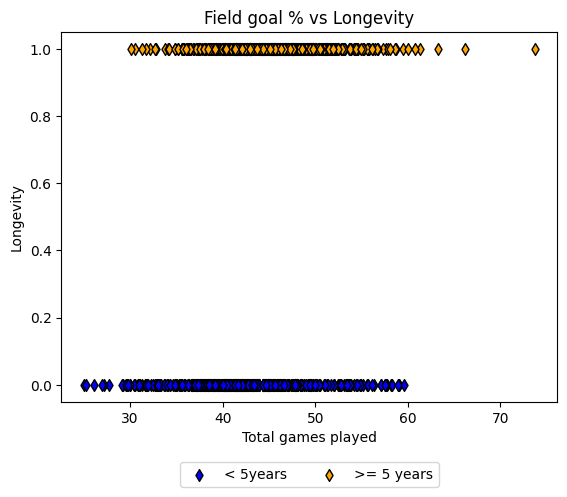

In [10]:
plt.scatter(target_0['FG%'], target_0["Target"], c='blue', edgecolors='black', marker='d', label='< 5years')
plt.scatter(target_1['FG%'], target_1["Target"], c='orange', edgecolors='black', marker='d', label='>= 5 years')
plt.xlabel("Total games played")
plt.ylabel("Longevity")
plt.title("Field goal % vs Longevity")
plt.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.savefig("images/fg%_vs_target.png");

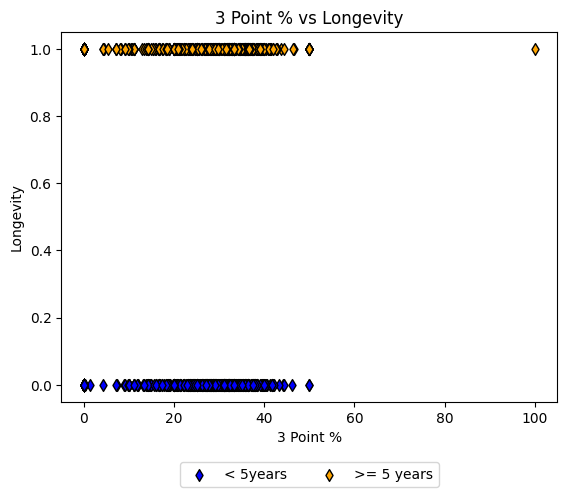

In [11]:
plt.scatter(target_0['3P%'], target_0["Target"], c='blue', edgecolors='black', marker='d', label='< 5years')
plt.scatter(target_1['3P%'], target_1["Target"], c='orange', edgecolors='black', marker='d', label='>= 5 years')
plt.xlabel("3 Point %")
plt.ylabel("Longevity")
plt.title("3 Point % vs Longevity")
plt.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.savefig("images/3p%_vs_target.png");

### Step 3: splitting and standardizing the training data

The Target column will be the target while the rest will be the features

In [12]:
# cast Target as categories
train_df['Target'] = train_df["Target"].astype('category')
train_df["Target"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1101 entries, 0 to 1100
Series name: Target
Non-Null Count  Dtype   
--------------  -----   
1101 non-null   category
dtypes: category(1)
memory usage: 1.3 KB


In [13]:
## training features
x = train_df.drop(columns=['Target'])
print(x.info())

# target to predict
y = train_df["Target"]
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   int32  
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
dtypes: float64(18), int32(1)
memory usage: 159.3 KB
None
<class 'pandas.core.series.Series'>
R

### NOTE

The cell below was used to standardize the dataset. However, the accuracy is worse after standardization and was highest an K = 1.  
You can uncomment it to see the effect on the accuracy plot.  

In [14]:
# standardize the data

# # instantiate the transformer
# std_scaler = StandardScaler()
# std_scaler.fit(x)

# # transform using the scaler
# X = std_scaler.transform(x)
# X = pd.DataFrame(X, columns=x.columns)


In [15]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(990, 19) (111, 19)
(990,) (111,)


### Step 4: train the model

Using the KNeighborsClassifier from sklearn

Maximum accuracy: 0.7837837837837838 at K=3


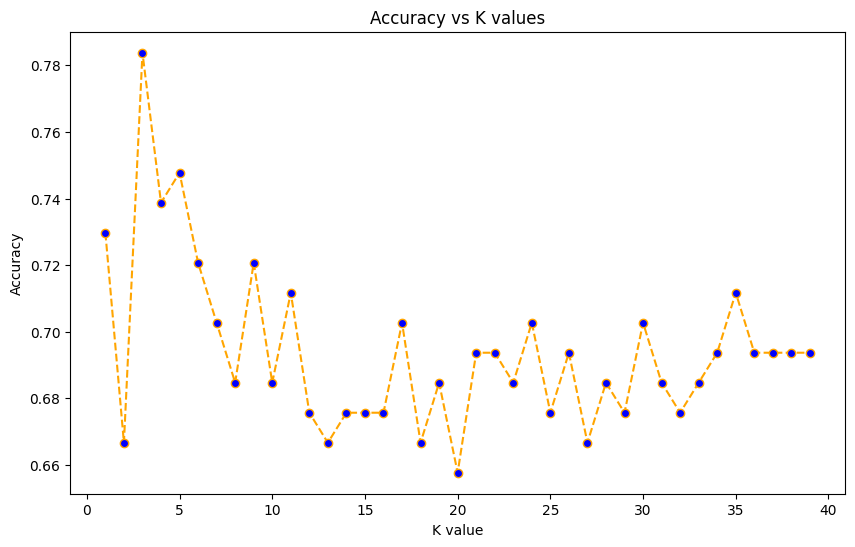

In [16]:
# iterate to find the best k value
acc = []
ks = []
for i in range(1, 40):
  ks.append(i)
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), acc, color='orange', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.xlabel('K value')
plt.ylabel("Accuracy")
plt.title("Accuracy vs K values")

max_acc, idx = max(acc), acc.index(max(acc))
print(f"Maximum accuracy: {max(acc)} at K={ks[idx]}")

In [17]:
# set the number of neighbors
k = 3 # gave the highest accuracy from the iteration above

# instantiate the model
model = KNeighborsClassifier(n_neighbors=k)

# fit the model to the training data
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# confirm the model is fitted
check_is_fitted(model)

### Step 5: evaluate with test split data

In [19]:
# obtain predictions using the test split data for comparison
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [20]:
# print the classification report
print(classification_report(y_test, y_pred))

# print the mean accuracy of the model for the test split
acc = model.score(X_test, y_test)
print(f"Mean accuracy of the model: {acc}")

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        55
           1       0.86      0.68      0.76        56

    accuracy                           0.78       111
   macro avg       0.80      0.78      0.78       111
weighted avg       0.80      0.78      0.78       111

Mean accuracy of the model: 0.7837837837837838


The report showed high accuracy with slightly lower recall especiall for those >= 5 career years. The model performance seems optimal

### Step 6: obtain predictions for the test data

In [21]:
# read test dataset
test_df = pd.read_csv("data/Test_data.csv")
test_df["GP"] = test_df["GP"].astype(int)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       555 non-null    int32  
 1   MIN      555 non-null    float64
 2   PTS      555 non-null    float64
 3   FGM      555 non-null    float64
 4   FGA      555 non-null    float64
 5   FG%      555 non-null    float64
 6   3P Made  555 non-null    float64
 7   3PA      555 non-null    float64
 8   3P%      555 non-null    float64
 9   FTM      555 non-null    float64
 10  FTA      555 non-null    float64
 11  FT%      555 non-null    float64
 12  OREB     555 non-null    float64
 13  DREB     555 non-null    float64
 14  REB      555 non-null    float64
 15  AST      555 non-null    float64
 16  STL      555 non-null    float64
 17  BLK      555 non-null    float64
 18  TOV      555 non-null    float64
dtypes: float64(18), int32(1)
memory usage: 80.3 KB


In [22]:
# obtain predications
test_pred = model.predict(test_df)
test_pred[:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [23]:
# convert prediction to a df
pred_df = pd.DataFrame.from_dict({"prediction": test_pred})
pred_df.head()

,prediction
0,1
1,0
2,0
3,0
4,1


In [24]:
# Save the complete test predictions to a file
pred_df.to_csv("predications.csv", index=False)